
    Step 1: Import Required Libraries

 This section imports all necessary libraries for:
  - Data Handling → pandas, numpy  
  - Visualization → seaborn, matplotlib  
  - Database Connection → mysql.connector  
  - API Handling → requests  


   Step 2: Load Data from Different Sources

 In this step, we collect data from multiple sources:

 - CSV File → Customers data
 - JSON File → Transactions data
 - MySQL Database → Products data
 - Public API → User data


    Step 3: Merge All Datasets

 We merge:
 - Customers with Transactions using `customer_id`
 - Result with Products using `product_id`

 Left join ensures that all customers are retained.

 After merging, we inspect:
 - df.info() → Data types & missing values
 - df.describe() → Statistical summary
 - df.head() → First few rows

In [ ]:
import pandas as pd
import numpy as ny
import seaborn as sns
import mysql.connector
import requests

  CSV
customers = pd.read_csv(r"E:\Rnw\python\practical_exam\customers - customers.csv.csv")

  JSON
transactions = pd.read_json(r"E:\Rnw\python\practical_exam\transactions.json")

  SQL



conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="company_aiml"
)

query = "SELECT * FROM products"
products = pd.read_sql(query, conn)

print(products)


  API
response = requests.get("https://dummyjson.com/users")
api_data = pd.json_normalize(response.json()['users'])

  Merge datasets
df = customers.merge(transactions, on="customer_id", how="left")
df = df.merge(products, on="product_id", how="left")


df.info()
df.describe()
df.head()


C:\Users\parth\AppData\Local\Temp\ipykernel_22764\2261971867.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  products = pd.read_sql(query, conn)


    product_id  product_name            category  price  stock
0        P0001     Product_1               Audio   1940   53.0
1        P0002     Product_2            Wearable   2478   39.0
2        P0003     Product_3            Computer   1723   56.0
3        P0004     Product_4  Mobile Accessories    541    8.0
4        P0005     Product_5         Electronics   2868   40.0
..         ...           ...                 ...    ...    ...
995      P0996   Product_996               Audio   2069   56.0
996      P0997   Product_997            Wearable   2472   30.0
997      P0998   Product_998            Computer    444   69.0
998      P0999   Product_999  Mobile Accessories    295   29.0
999      P1000  Product_1000                None  50000   21.0

[1000 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20091 entries, 0 to 20090
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   c

,customer_id,name,age,gender,city,income,transaction_id,product_id,amount,payment_mode,date,product_name,category,price,stock
0,1,Arjun Verma,56,Female,Jaipur,896150.0,T002318,P0468,281.0,UPI,2025-11-15,Product_468,Computer,1006.0,64.0
1,1,Arjun Verma,56,Female,Jaipur,896150.0,T004426,P0810,822.0,Net Banking,2025-09-08,Product_810,Electronics,10000.0,NaN
2,1,Arjun Verma,56,Female,Jaipur,896150.0,T012020,P0821,680.0,Cash,2025-12-18,Product_821,Audio,2710.0,72.0
3,2,Shaurya Khan,32,Male,Hyderabad,758372.0,T004924,P0633,4006.0,Cash,2025-10-14,Product_633,Computer,2734.0,21.0
4,3,Anika Verma,38,Female,Surat,184812.0,T002934,P0350,2645.0,UPI,2025-03-06,Product_350,Electronics,25000.0,-5.0


   Step 4: Distribution Analysis (Histogram)

We generate histograms for all numeric columns
 to understand:
 - Distribution shape
 - Skewness
 - Presence of outliers

 This helps identify transformation needs.

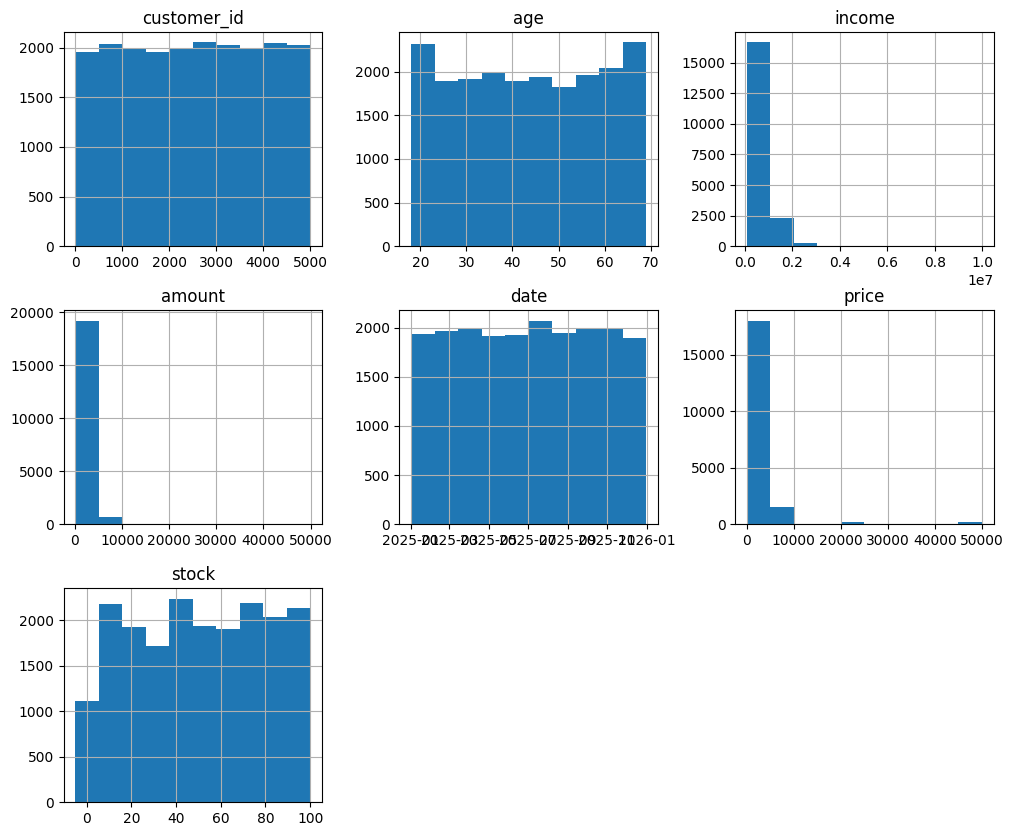

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(12,10))
plt.show()


     Step 5: Skewness Detection
 
  We calculate skewness for numeric columns.
 
  Interpretation:
  - Skewness ≈ 0 → Normal distribution
  - Positive skew → Right-tailed
  - Negative skew → Left-tailed
 
  Highly skewed features may need transformation.

In [53]:
df.skew(numeric_only=True)


customer_id   -0.013087
age           -0.012231
income         6.219797
amount         9.832723
price          6.103345
stock         -0.012969
dtype: float64


## Step 6: Generate Automated EDA Report
  
   Using ydata_profiling to create a complete
   exploratory data analysis report.
  
   This report includes:
   - Correlation analysis
   - Missing values summary
   - Distribution plots
   - Warnings & data quality checks
  
   The report is saved as "eda_report.html".

In [54]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_file("eda_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 72.17it/s]


In [55]:
df.columns

Index(['customer_id', 'name', 'age', 'gender', 'city', 'income',
       'transaction_id', 'product_id', 'amount', 'payment_mode', 'date',
       'product_name', 'category', 'price', 'stock'],
      dtype='object')


## Step 8: Boxplot Analysis

 We analyze income distribution across different
 payment modes using a boxplot.

 This helps detect:
 - Income spread
 - Median differences
 - Outliers

<Axes: xlabel='payment_mode', ylabel='income'>

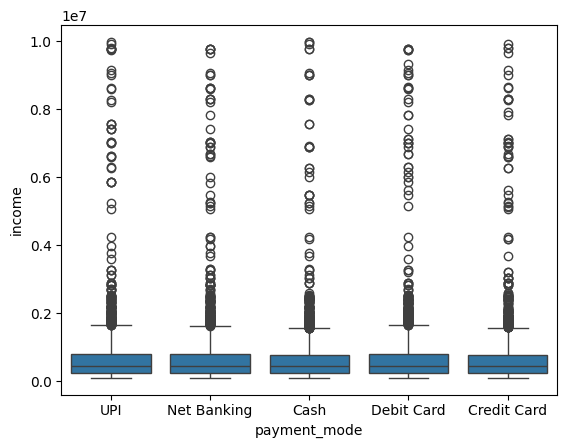

In [56]:
sns.boxplot(x="payment_mode", y="income", data=df)



## Step 9: Correlation Heatmap

 We compute correlation between numeric features
 and visualize it using a heatmap.

 This helps identify:
 - Strong relationships
 - Multicollinearity

<Axes: >

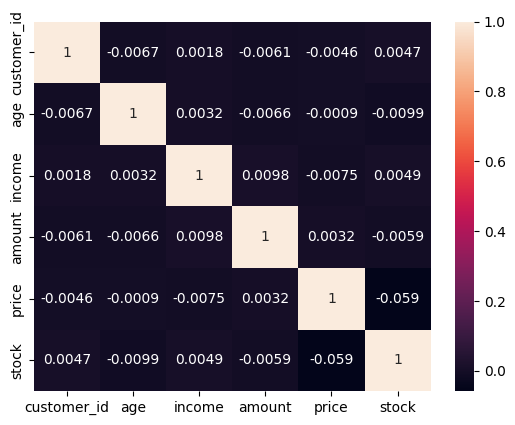

In [57]:
sns.heatmap(df.corr(numeric_only=True), annot=True)



## Step 10: Pairplot Visualization

 Pairplot shows relationships between numeric features.

 Coloring by payment_mode helps observe
 class-wise feature separation.

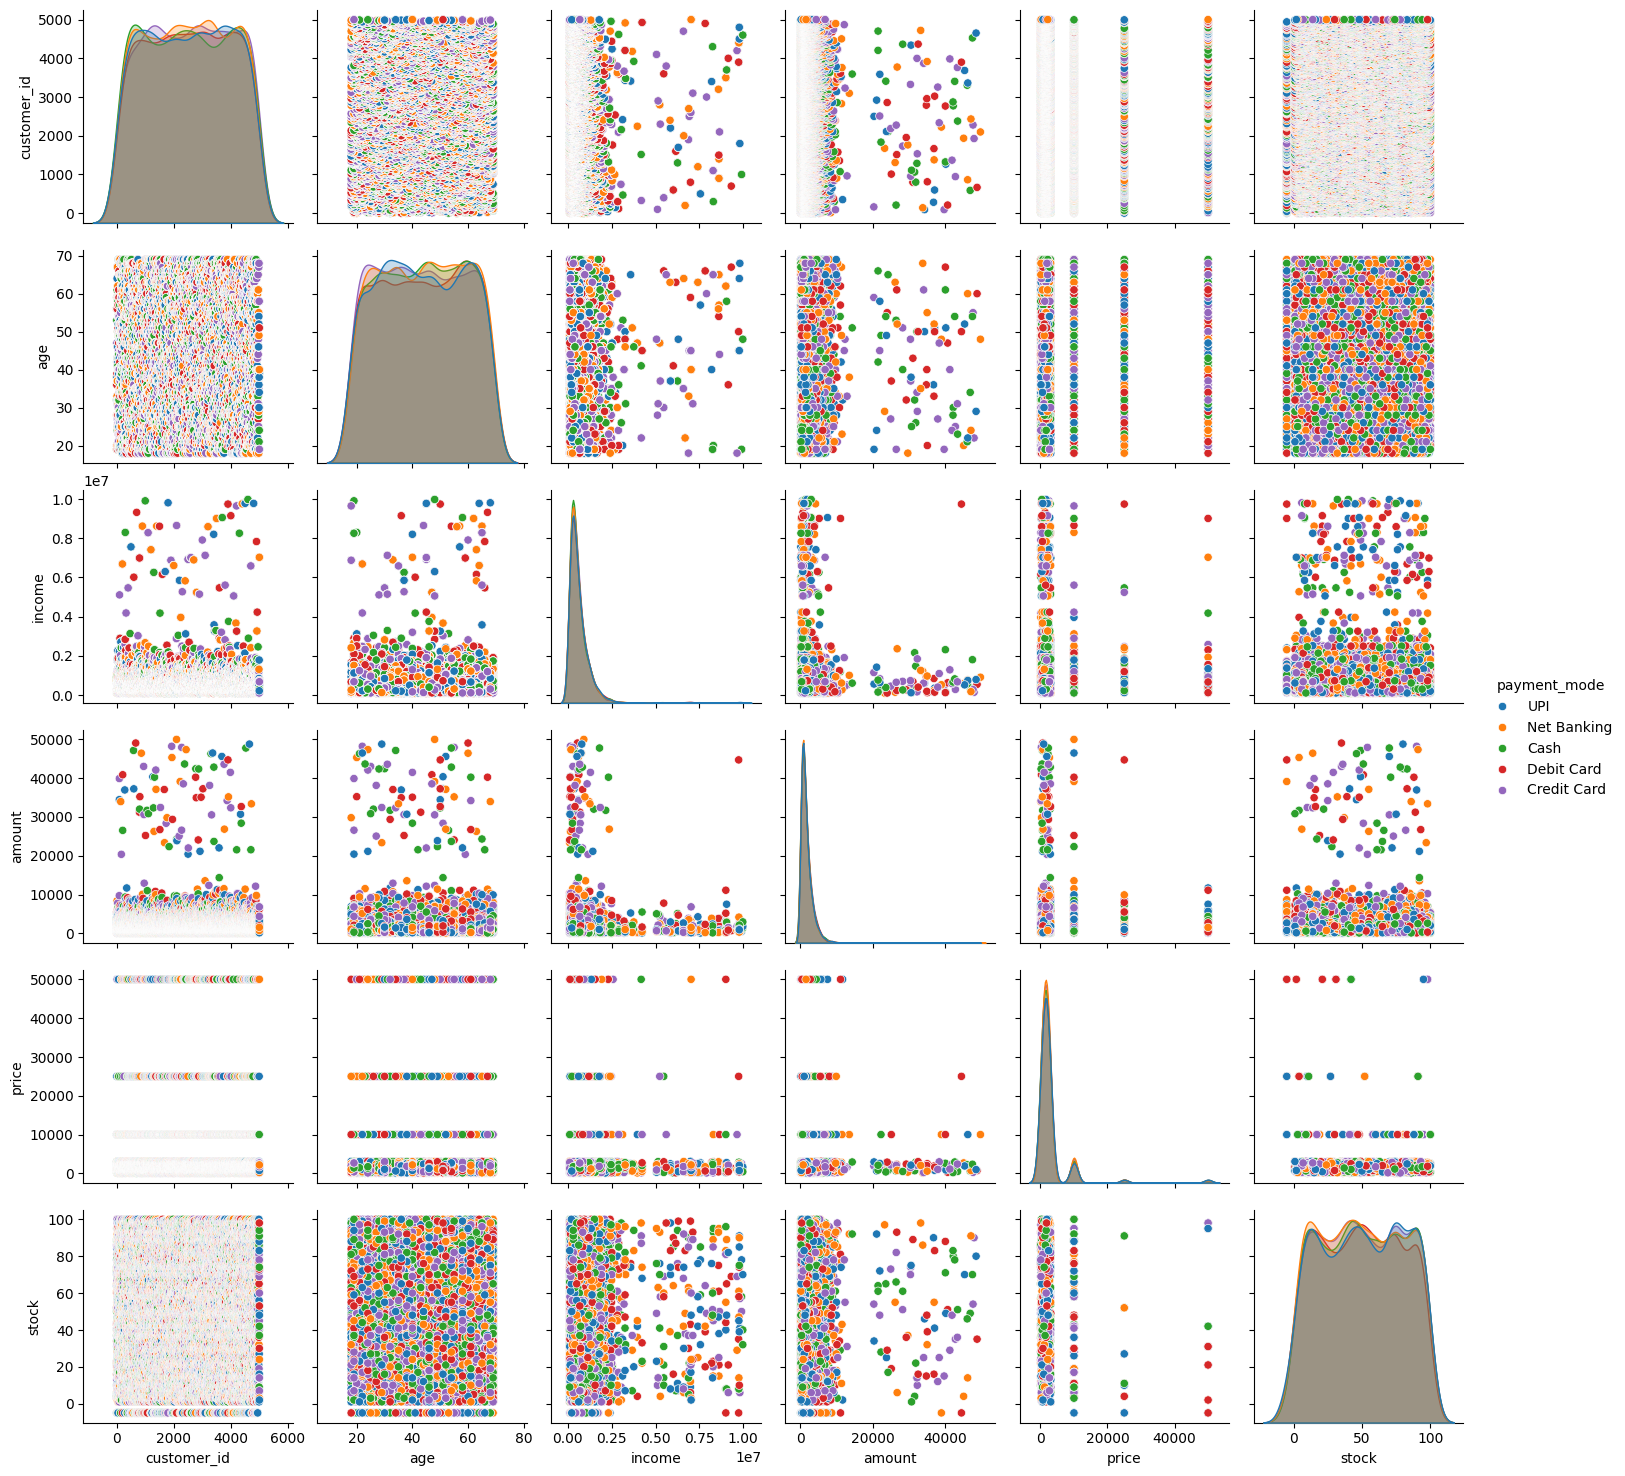

In [58]:
sns.pairplot(df, hue="payment_mode")

# 📊 Pairplot Summary – Customer Transactions Dataset

## 🔎 Variables Observed
- `customer_id`
- `age`
- `income`
- `amount`
- `price`
- `stock`
- `payment_mode` (UPI, Net Banking, Cash, Debit Card, Credit Card)

---

## 📈 Distribution Insights (Diagonal Plots)

### 👤 Customer ID
- Uniform distribution.
- No meaningful analytical insight (identifier variable).

### 🎂 Age
- Evenly distributed between ~18–70.
- No visible skewness.

### 💰 Income
- Highly **right-skewed**.
- Most customers fall in lower income range.
- Few high-income outliers present.

### 💳 Amount
- Strong **right-skewed distribution**.
- Majority of transactions are small.
- Few high-value transactions (outliers).

### 🏷️ Price
- Appears clustered at specific levels (likely fixed product pricing).
- Not continuous — discrete price bands visible.

### 📦 Stock
- Fairly uniform distribution between 0–100.
- No strong skewness.

---

## 🔗 Relationship Insights (Scatter Plots)

### Age vs Income
- No strong correlation.
- Income spread across all age groups.

### Income vs Amount
- Slight tendency for higher income customers to make higher purchases.
- But relationship is weak.

### Price vs Amount
- Clear clustering due to discrete price levels.
- Higher price products sometimes linked to higher transaction amounts.

### Stock vs Price
- No strong visible correlation.
- Inventory levels appear independent of price.

### Payment Mode Impact
- All payment modes are evenly distributed.
- No dominant payment method visible.
- No clear pattern linking payment mode with:
  - Income
  - Age
  - Amount

---

## 🚨 Outliers Detected
- High-income extreme values.
- Large transaction amounts.
- Few high-price product purchases.

---

## 📌 Overall Conclusion

- Dataset contains **skewed financial variables** (`income`, `amount`).
- Most relationships between variables appear **weak or non-linear**.
- Payment mode does not significantly affect transaction patterns.
- Suitable for:
  - Log transformation (income, amount)
  - Outlier treatment
  - Further correlation analysis
  - Feature engineering

---




## Step 11: Handle Missing Values (Numerical - Mean Imputation)

 Missing values in 'income' are replaced
 using the mean strategy.

 Suitable when data is approximately normally distributed.

In [59]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy="mean")
df['income'] = mean_imputer.fit_transform(df[['income']])

In [60]:
df.columns

Index(['customer_id', 'name', 'age', 'gender', 'city', 'income',
       'transaction_id', 'product_id', 'amount', 'payment_mode', 'date',
       'product_name', 'category', 'price', 'stock'],
      dtype='object')


## Step 12: Handle Missing Values (Categorical - Mode)

 Missing values in 'gender' are replaced
 using the most frequent value.

 This preserves category consistency.

In [61]:
cat_cols = ['gender']

mode_imputer = SimpleImputer(strategy='most_frequent')

df[cat_cols] = mode_imputer.fit_transform(df[cat_cols])


## Step 13: Create Missing Indicator Feature

 A new binary column is created:
 - 1 → Value was missing
 - 0 → Value was present



In [62]:
df['income_missing'] = df['income'].isna().astype(int)

## Step 14: Check Missing Values Count

 Displays total non-null values in each column.
 Helps verify imputation effectiveness.

In [63]:
df.isnull().count()

customer_id       20091
name              20091
age               20091
gender            20091
city              20091
income            20091
transaction_id    20091
product_id        20091
amount            20091
payment_mode      20091
date              20091
product_name      20091
category          20091
price             20091
stock             20091
income_missing    20091
dtype: int64

## Step 15: KNN Imputation

 Missing numeric values are filled using
 K-Nearest Neighbors approach.


In [64]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=5)
df_knn = knn.fit_transform(df.select_dtypes(include='number'))

## Step 16: Iterative Imputation (MICE)

 Uses regression models to predict missing values.


In [65]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mice = IterativeImputer(max_iter=10)
df_mice = mice.fit_transform(df.select_dtypes(include='number'))

## Step 17: Drop Missing Values

 Removes all rows containing missing values.


In [66]:
df_drop = df.dropna()

## Step 18: Outlier Removal (Z-Score Method)

 Observations with Z-score > 3 are removed.


In [67]:
from scipy import stats
z_scores = stats.zscore(df['income'])
df = df[(abs(z_scores) < 3)]

## Step 19: Outlier Removal (IQR Method)

 Uses Interquartile Range:
 - Lower Bound = Q1 - 1.5*IQR
 - Upper Bound = Q3 + 1.5*IQR

 Removes extreme values.

In [68]:
Q1 = df['income'].quantile(0.25)
Q3 = df['income'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['income'] >= Q1 - 1.5*IQR) & 
        (df['income'] <= Q3 + 1.5*IQR)]

## Step 20: Remove Extreme Top 1% Values

 Removes values above 99th percentile.

 Useful when extreme high values distort analysis.

In [69]:
df = df[df['income'] < df['income'].quantile(0.99)]

## Step 21: Winsorization

 Caps extreme values instead of removing them.

 Preserves dataset size while controlling outliers.

In [70]:
from scipy.stats.mstats import winsorize
df['income'] = winsorize(df['income'], limits=[0.01,0.01])

## Step 22: Extract Date Features

 Converted 'date' column to datetime format.

 Extracted:
 - Year
 - Month
 - Day

 Useful for time-based analysis.

In [71]:
df['date'] = pd.to_datetime(df['date'])

df['purchase_year'] = df['date'].dt.year
df['purchase_month'] = df['date'].dt.month
df['purchase_day'] = df['date'].dt.day

## Step 24: One-Hot Encoding

 Converts 'city' into multiple binary columns.

 Prevents ordinal assumptions.

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [73]:
df.columns

Index(['customer_id', 'name', 'age', 'gender', 'city', 'income',
       'transaction_id', 'product_id', 'amount', 'payment_mode', 'date',
       'product_name', 'category', 'price', 'stock', 'income_missing',
       'purchase_year', 'purchase_month', 'purchase_day'],
      dtype='object')

In [74]:
df = pd.get_dummies(df, columns=['city'])

## Step 25: Feature Scaling

 - StandardScaler → income
 - MinMaxScaler → age

 Scaling ensures equal feature contribution.

In [75]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

num_cols = ['income','age']

ct = ColumnTransformer([
    ('std', StandardScaler(), ['income']),
    ('minmax', MinMaxScaler(), ['age'])
])

df_scaled = ct.fit_transform(df)

## Step 26: Create Total Purchases Feature

 Counts total transactions per customer.

 Helps identify customer activity level.

In [76]:
df['total_purchases'] = df.groupby('customer_id')['transaction_id'].transform('count')

## Step 27: Days Since First Purchase

 Calculates number of days since
 customer's first transaction.

Useful for behavioral analysis.

In [77]:
df['date'] = pd.to_datetime(df['date'])

first_purchase = df.groupby('customer_id')['date'].transform('min')

df['days_since_first_purchase'] = (df['date'] - first_purchase).dt.days + 1

## Step 28: Purchase Frequency

 Calculates purchases per day.

 Indicates engagement level.

In [78]:
df['purchase_per_day'] = df['total_purchases'] / df['days_since_first_purchase']

## Step 29: Log Transformation

 Applies log1p transformation on income.

 Reduces skewness and stabilizes variance.

In [79]:
import numpy as np
df['log_income'] = np.log1p(df['income'])

## Step 30: Yeo-Johnson Transformation

 Power transformation to make distribution
 more Gaussian-like.

 Works with zero and negative values.

In [80]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df[['income']] = pt.fit_transform(df[['income']])

## Step 31: Create Frequent Buyer Flag

 Customers with more than 10 purchases
 are marked as 1 (Frequent Buyer).

 Others are marked as 0.

In [81]:
df['frequent_buyer'] =  (df['total_purchases'] > 10).astype(int)

## Step 32: Save Processed Data

 Final cleaned and engineered dataset
 is saved as "processed_customer_data.csv".

 This dataset is ready for modeling.

In [82]:
df.to_csv("processed_customer_data.csv", index=False)